<a href="https://colab.research.google.com/github/jishnu-RC101/Step-Estimation/blob/main/Tasks_2_%5BEstimate_Step_Counts%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tasks 2 [Estimate Step Counts]**
##*The task is divided in different segments:*
###1) Collecting the Accelerometer data
###2) Importing the Accelerometer data
###3) Visualizing the initial data
###4) Processing the Data 
###5) Peak detection algo for step counting


---


#1) Collecting the Accelerometer data

The accelerometer data is collected by using smartphone with the help of [MATLAB Mobile](https://play.google.com/store/apps/details?id=com.mathworks.matlabmobile) application. The Sampling Rate was set to 10Hz therefore a total of 10 data points are recorded in each second. A total of 1 min [walking data](https://drive.google.com/file/d/1lslYzroJO8rfcejZS4v5I51d9lVZJJAY/view?usp=sharing) was collected.


---
###**The picture down below shows a sample of the acquisition process**

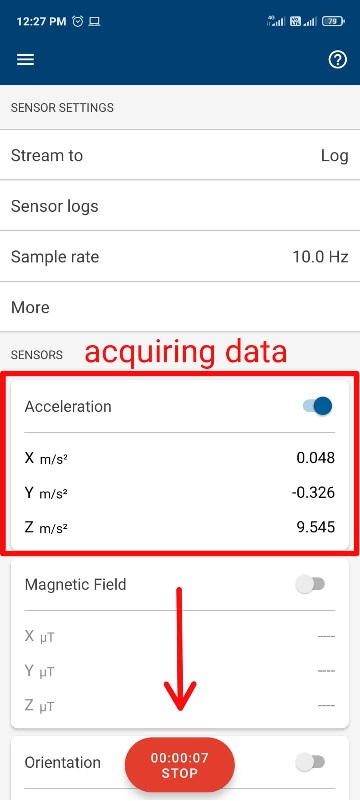




#2) Importing the accelerometer data

---


To import the data, a connection with the drive has been establised and further, python pandas library has been used.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd

Seeing the atributes of the data which includes Timestamp, accelerometer variables (x,y,z-axis)


In [41]:
data= pd.read_csv("/content/drive/My Drive/acc_data1.csv")
data

,Timestamp,X,Y,Z
0,08-04-2022 11:50:25.174,-3.7596,-9.5961,0.8106
1,08-Apr-2022 11:50:25.268,-4.0244,-9.6392,1.3363
2,08-Apr-2022 11:50:25.362,-3.7677,-9.6253,0.8891
3,08-Apr-2022 11:50:25.456,-3.9573,-9.5855,1.1826
4,08-Apr-2022 11:50:25.550,-3.9406,-9.5108,0.9916
...,...,...,...,...
585,08-Apr-2022 11:51:21.780,-0.6424,-1.7184,9.0498
586,08-Apr-2022 11:51:21.880,0.7096,-0.2686,9.6779
587,08-Apr-2022 11:51:21.980,1.1596,1.5317,8.5659
588,08-Apr-2022 11:51:22.080,1.4320,2.6378,8.2407


Next we move on to the data visualization portion

# 3) Visualizing the initial data 

---


An initial plotting is done to visualize the initial attributes of the data graphically.
###**Accelerometer Time vs Accelerometer Variables(X, Y, Z-axis) plot**
(Note: The x-axis of the graph denotes the relative time and the y-axis of the graph denotes the acceleration)

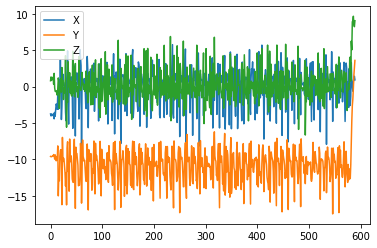

In [42]:
data.plot()

From the above graph we can see that the accceleration of the 3 axes changes while walking with the phone kept inside the pocket. Therefore a following assumption can be made regarding phone's vector coordinates.

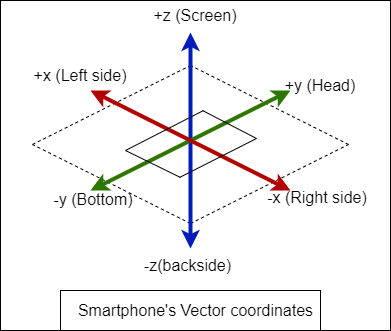

Therefore according to the above notation and output graph of the data, the smartphone was placed in the pocket with its head pointing towards the gravity as the acceleration in the Y-axis is in the range between -6.214<=y<=17.4967.

---


Creating an Interactive plot for each Accelerometer Variable (X, Y, Z-axis) using plotly library

In [43]:
import plotly.graph_objects as go

In [44]:
data.columns

Index(['Timestamp', 'X', 'Y', 'Z'], dtype='object')

##The X-axis acceleration tells about the change in accleration at walking state in the direction of propagation. Let's have a look at it!

In [45]:
fig_X = go.Figure(go.Scatter(x = data.Timestamp, y = data.X,
                  name='X-Axis',line=dict(color="rgb(0,110,255)")))
fig_X.update_layout(title='X-Axis Accleration plot',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig_X.update_xaxes(title_text='Time ->')
fig_X.update_yaxes(title_text='Acceleration (m/s^2) ->')
fig_X.show()

## The Y-axis acceleration tells about the change in accleration at walking state in the direction of the gravity.

In [46]:
fig_Y = go.Figure(go.Scatter(x = data.Timestamp, y = data.Y,
                  name='Y',line=dict(color="rgb(255,159,89)")))
fig_Y.update_layout(title='Y-Axis Acceleration Plot',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig_Y.update_xaxes(title_text='Time ->')
fig_Y.update_yaxes(title_text='Acceleration (m/s^2) ->')
fig_Y.show()

##And finally the Z-axis acceleration tells about the change in accleration at walking state in the direction perpendicular to the propagation.

In [47]:
fig_Z = go.Figure(go.Scatter(x = data.Timestamp, y = data.Z,
                  name='Z',line=dict(color="rgb(29,150,65)")))
fig_Z.update_layout(title='Z-Axis Acceleration Plot',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig_Z.update_xaxes(title_text='Time ->')
fig_Z.update_yaxes(title_text='Acceleration (m/s^2) ->')
fig_Z.show()

##Let's have a look at all the three accelerations together.

In [48]:
fig = go.Figure(go.Scatter(x = data.Timestamp, y = data.X,
                  name='X-Axis',line=dict(color="rgb(0,110,255)")))
fig.add_trace(go.Scatter(x = data.Timestamp, y = data.Y,
                  name='Y-axis',line=dict(color="rgb(255,159,89)")))
fig.add_trace(go.Scatter(x = data.Timestamp, y = data.Z,
                  name='Z-axis',line=dict(color="rgb(29,150,65)")))
fig.update_layout(title='3-Axis Acceleration Plot',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig.show()

#4) Processing the data

From the above analysis we can see that there is a change in acceleration while walking but in different directions. So to eliminate the directivity of the data, the total acceleration magnitude is calculated by converting acceleration vectors (X, Y and Z-axis) at each point in time into scalar values. This enables the detection of large changes in overall acceleration, such as steps taken while walking, regardless of device orientation.

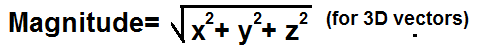

In [49]:
mag=(((data.X)**2)+((data.Y)**2)+((data.Z)**2))**0.5
fig_mag = go.Figure(go.Scatter(y = mag,
                  name='total magnitude'))
fig_mag.update_xaxes(title_text='Relative Time')
fig_mag.update_yaxes(title_text='Total Acceleration |a| (m/s^2)')
fig_mag.update_layout(title='Total Magnitude of the Acceleration Plot',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig_mag.show()

##**Creating the Convolution Filter**

In [50]:
def convo_fil(x_i,h):
  # h=impulse response
  # x_1=input response

  #changing the pandas series into list
  x=[] 
  for i in x_i:
    x +=[i]
  #finding the total length of the funtions
  N1 = len(x)
  N2 = len(h)
  N = N1+N2-1
  
  #initially assigning the funtion with zeros
  y=[]
  for i in range(0,N):
    y +=[0]
  
  m = N-N1
  n = N-N2

  #Applying Zero padding to x and h to make their length to N
  x_pad=[]
  h_pad=[]
  for i in range (0,m):
    x_pad +=[0]
  for i in range (0,n):
    h_pad +=[0]
  x1 = x+x_pad
  h1 = h+h_pad

  #Creating the linear convolution operation using convolution sum formula
  for n in range (N):
      for k in range (N):
          if n >= k:
              y[n] = y[n]+x1[n-k]*h1[k]
  return y

##Creating a Filter Impulse Response of window length 13

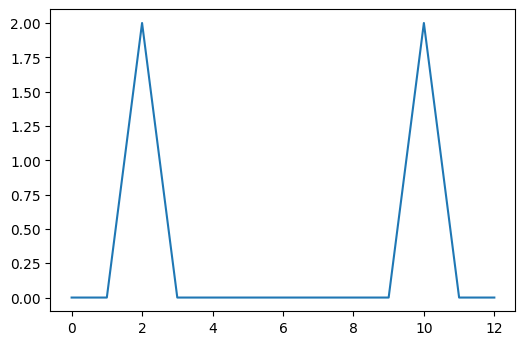

In [51]:
import matplotlib.pyplot as plt

#creating a peak impulse response
win=[0,0,2,0,0,0,0,0,0,0,2,0,0]
plt.figure(dpi=100)
plt.plot(win)
plt.show()

##Applying the Convolution Filter

The convolution filter is applied and then the convoluted function is visualised through the interactive plot

In [52]:
cov_fil=convo_fil(x_i=mag,h=win)
fig_connv = go.Figure(go.Scatter(y = cov_fil,
                  name='total magnitude'))
fig_connv.update_xaxes(title_text='Relative Time')
fig_connv.update_yaxes(title_text='Peak Intensity')
fig_connv.update_layout(title='Convolution filter output',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig_connv.show()

##Let us Correlate with the in built convolution funtion in Scipy library

```
scipy.signal.convolve
```


In [66]:
import matplotlib.pyplot as plt
from scipy.signal import convolve
filtered=convolve(mag, win, mode='same')
fig_fil = go.Figure(go.Scatter(y = filtered,
                  name='total magnitude'))
fig_fil.update_xaxes(title_text='Relative Time')
fig_fil.update_yaxes(title_text='Peak Intensity')
fig_fil.update_layout(title='In-built Convolution output',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)
fig_fil.show()

##By comparing the peak values we can see that the Convolution Filter function which has been created is equivalant to the convolution function of in-built python libraries.
**Therefore the convolution operation has been implemented succesfully**

---



#5) Peak Detection for counting the steps

Till now we have visualized, processed and filtered the data. The main part is to evaluating the number of steps taken by the user while walking. This is a simple task as now we have to apply a peak detection algorithm which in our case will be finding the local maxima ("peaks") in the input vector or signal.



###Let's compute the peak detection operation

```
detect_peaks(v='input vector or signal', delta= 'threshold value')
```



In [61]:
import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def detect_peaks(v, delta, x = None):

    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    # v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

Now implementing this operation in the convoluted function (the proposed algo)

In [59]:
#calculating the number of peaks in the input filtered signal
series = cov_fil
maxtab, mintab = detect_peaks(series,6)
maxp=maxtab[:,0]
"""
converting the peak positions into integer as the peaks are with respect to a specific maximum point of the input signal

"""
c=0
m1=[]
for i in maxp:
  m1 +=[int(i)]

In [58]:
fig_peak = go.Figure()
fig_peak.add_trace(go.Scatter(
    y=cov_fil,
    mode='lines',
    name='Original Plot'))
fig_peak.add_trace(go.Scatter(
    x=m1,
    y=[cov_fil[j] for j in m1],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
fig_peak.update_xaxes(title_text='Relative Time')
fig_peak.update_yaxes(title_text='Total Acceleration |a| (m/s^2)')
fig_peak.show()

###Let's try to find out the peaks of the convoluted function (in-built library function) by using

```
scipy.signals.find_peaks()
```

In [68]:
from scipy.signal import find_peaks
k=find_peaks(filtered,prominence=6)[0] #same prominence value has been incorporated in both the functions.
fig_peak2 = go.Figure()
fig_peak2.add_trace(go.Scatter(
    y=filtered,
    mode='lines',
    name='Original Plot'))
fig_peak2.add_trace(go.Scatter(
    x=k,
    y=[filtered[j] for j in k],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
fig_peak2.update_xaxes(title_text='Relative Time')
fig_peak2.update_yaxes(title_text='Total Acceleration |a| (m/s^2)')
fig_peak2.show()

Now the moment of truth whether the computed algorithm is correct or not by comparing the number of steps taken while walking using the proposed algorithm as well as the in-built functions.

In [70]:
#1st case(detect_peaks()):
steps_own = len(m1)
steps_inbuilt = len(k)

print(f"Total number of steps estimated by the proposed algorithm = {steps_own}")
print(f"Total number of steps estimated by the in-built functions = {steps_inbuilt}")

Total number of steps estimated by the proposed algorithm = 122
Total number of steps estimated by the in-built functions = 122


The calculated value in both the cases are same and this values coorelate with the manually calculated steps during the data acquisition process.

---



**Hence The method computed is 100% accurate for determining the number of steps.**

---



###This Section contains another way in with the convolution filter can be applied. (Testing Section, comparison with the previous method)

In [73]:
from scipy.signal import convolve, windows
con=convolve(in1=data.X, in2=data.Z, mode='same')
con2 = convolve(in1=con, in2=data.Y, mode='same')
con2 = convolve(in1=con2, in2=win, mode='same')
fig_con2=go.Figure(go.Scatter(y=con2))
fig_con2.show()

In [75]:
k=find_peaks(con2, prominence=6)[0]
fig_con2 = go.Figure()
fig_con2.add_trace(go.Scatter(
    y=con2,
    mode='lines',
    name='Original Plot'))
fig_con2.add_trace(go.Scatter(
    x=k,
    y=[con2[j] for j in k],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
fig_con2.show()
print(f"Total Number of Steps taken = {len(k)}")

118




---


**As we can see that this method is not convinent for the steps estimation because it is not 100% accurate**

---

